In [394]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
import seaborn as sns

import palettable
from palettable.colorbrewer.sequential import Reds_3

mycmap = mpl.colors.LinearSegmentedColormap.from_list('custom',
                                             [(0,    'white'),
                                              (0.3,  'white'),
                                              (1,    '#ff0000')], N=126)

In [519]:
def get_contactmap(filename):
    df = pd.read_csv(filename, sep=" ", header=None)
    #df /= df.stack().mean()
    df = np.array(df)
    df = df[0:1023, 0:1023]
    df /= df[0][0]

    #df = np.log(df)
    return df

In [564]:
contact = get_contactmap("./long/contacts500000.txt")

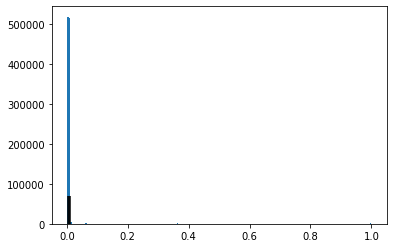

In [565]:
n, bins, t = plt.hist(contact.flatten(), bins=200)
plt.vlines(contact.mean(), ymin=0,ymax=70000)
plt.vlines(contact.mean()+0.1*contact.std(), ymin=0,ymax=70000)
plt.vlines(contact.mean()-0.1*contact.std(), ymin=0,ymax=70000)


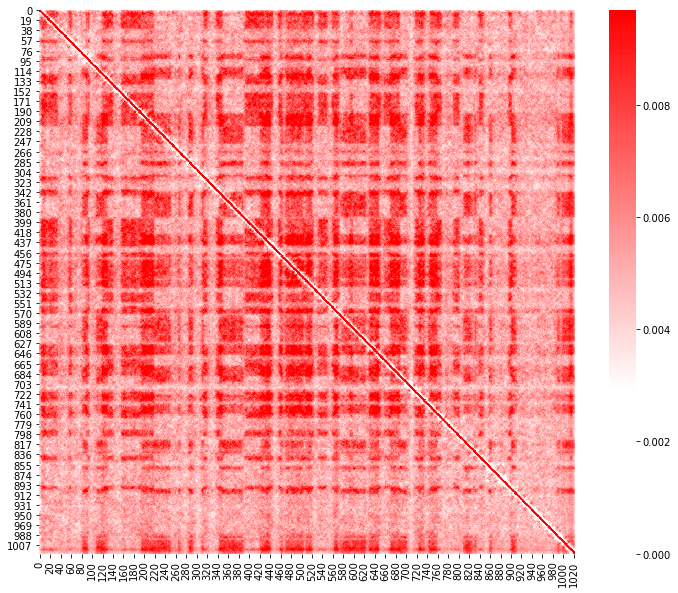

In [566]:
plt.figure(figsize=(12,10))
#sns.heatmap(df, cmap=mycmap, vmin = df.mean()-3*df.std(), vmax = df.mean()+df.std())
sns.heatmap(contact, cmap=mycmap, vmin = 0, vmax = contact.mean()+0.05*contact.std())

In [554]:
seq1 = np.array(pd.read_csv("seq1.txt"))
seq2 = np.array(pd.read_csv("seq2.txt"))

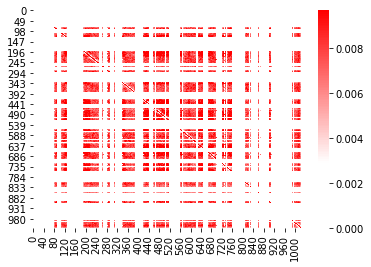

In [568]:
np.outer(seq1,seq1)*contact
sns.heatmap(np.outer(seq1,seq1)*contact, cmap=mycmap, vmin = 0, vmax = contact.mean()+0.05*contact.std())

In [583]:
s = np.zeros((2,2))
s[0,0] = np.mean((np.outer(seq1,seq1)*contact).flatten())
s[1,0] = np.mean((np.outer(seq1,seq2)*contact).flatten())
s[1,1] = np.mean((np.outer(seq2,seq2)*contact).flatten())

print(s)

[[0.00215483 0.        ]
 [0.00167605 0.00218164]]


In [591]:
obs = pd.read_csv("./long/observables.traj", sep='\t', header=None)

In [596]:
o = np.zeros((2,2))

o[0,0] = np.mean(obs[1])
o[1,0] = np.mean(obs[2])
o[1,1] = np.mean(obs[3])

In [599]:
o

array([[0.00215194, 0.        ],
       [0.00166828, 0.00216752]])

In [646]:
def process(folder):
    contact = get_contactmap("./" + folder + "/contacts100000.txt")
    seq1 = np.array(pd.read_csv("seq1.txt"))
    seq2 = np.array(pd.read_csv("seq2.txt"))
    
    goal_exp = np.zeros((2,2))
    goal_exp[0,0] = np.mean((np.outer(seq1,seq1)*contact).flatten())
    goal_exp[1,0] = np.mean((np.outer(seq1,seq2)*contact).flatten())
    goal_exp[1,1] = np.mean((np.outer(seq2,seq2)*contact).flatten())
    
    obs = pd.read_csv("./" + folder + "/observables.traj", sep='\t', header=None)
    goal_sim = np.zeros((2,2))

    goal_sim[0,0] = np.mean(obs[1][:10000])
    goal_sim[1,0] = np.mean(obs[2][:10000])
    goal_sim[1,1] = np.mean(obs[3][:10000])
    
    
    print(goal_exp)
    print(goal_sim)

In [647]:
process("long")

[[0.00218438 0.        ]
 [0.00169302 0.00219985]]
[[0.00218115 0.        ]
 [0.00168555 0.00218543]]


In [643]:
process("long")

[[0.00215483 0.        ]
 [0.00167605 0.00218164]]
[[0.00215194 0.        ]
 [0.00166828 0.00216752]]


In [614]:
folder = "long"
obs = pd.read_csv("./" + folder + "/observables.traj", sep='\t', header=None)

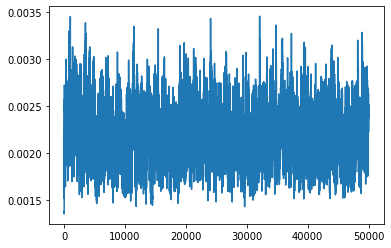

In [618]:
plt.plot(obs[3])

In [637]:
means = []
for final in np.arange(1000,len(obs[1]),1000):
    means.append(np.mean(obs[1][100:final]))

In [638]:
np.mean(obs[1][100:]) 

0.002152418997995992

In [639]:
np.std(obs[1][100:])

0.0002646502806609239

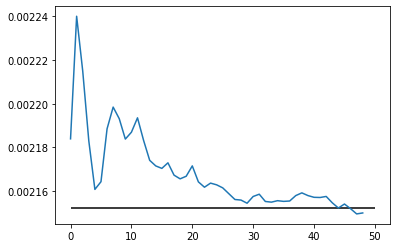

In [640]:
plt.plot(means)
plt.hlines(np.mean(obs[1][100:]), 0, 50)

<ErrorbarContainer object of 3 artists>

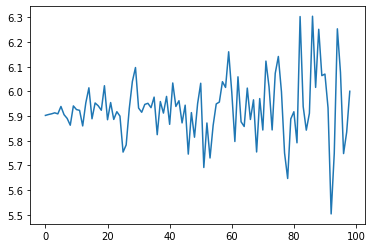

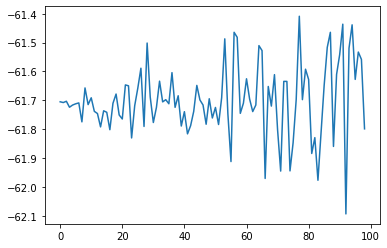

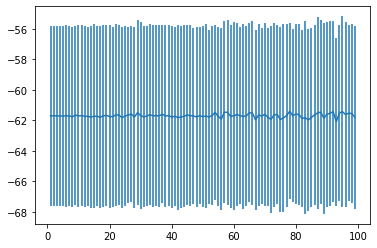

In [384]:
reductions = np.arange(1,100,1)

stds = []
means = []

energies = df[2][10:]

for r in reductions:
    reduced = [e for e in energies[0::r]]
    stds.append(np.std(reduced))
    means.append(np.mean(reduced))

plt.plot(stds)
plt.figure()
plt.plot(means)

plt.figure()
plt.errorbar(x=reductions, y=means,yerr=stds)

In [547]:
df = pd.read_csv("data_out/energy.traj", sep=' ', header=None)

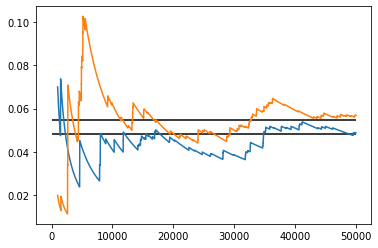

In [548]:
start = 1000
plt.plot(df[4][start:]/df[0][start:]*100)
plt.plot(df[5][start:]/df[0][start:]*100)
plt.hlines(np.mean(df[4]/df[0]*100), xmin=0, xmax=50000)
plt.hlines(np.mean(df[5]/df[0]*100), xmin=0, xmax=50000)
